In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import  svm

In [29]:

import quandl
quandl.ApiConfig.api_key="iv-pFeiks4_v_ck5nFVT"

In [30]:
df=quandl.get("EOD/AAPL")

In [31]:
df.head()

Open    High     Low    Close      Volume  Dividend  Split  \
Date                                                                       
2013-09-03  493.10  500.60  487.35  488.580  11854600.0       0.0    1.0   
2013-09-04  499.56  502.24  496.28  498.691  12322600.0       0.0    1.0   
2013-09-05  500.25  500.68  493.64  495.270   8441700.0       0.0    1.0   
2013-09-06  498.44  499.38  489.95  498.220  12840200.0       0.0    1.0   
2013-09-09  505.00  507.92  503.48  506.170  12167400.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2013-09-03  15.619650  15.857223  15.437510  15.476472  331928800.0  
2013-09-04  15.824280  15.909173  15.720381  15.796753  345032800.0  
2013-09-05  15.846136  15.859757  15.636755  15.688388  236367600.0  
2013-09-06  15.788802  15.818578  15.519869  15.781833  359525600.0  
2013-09-09  15.996600  16.089095  15.948451  16.033661  340687200.0

In [32]:
df.shape

(1090, 12)

In [33]:
df.tail()

Open     High      Low   Close      Volume  Dividend  Split  \
Date                                                                        
2017-12-21  174.17  176.020  174.100  175.01  20949896.0       0.0    1.0   
2017-12-22  174.68  175.424  174.500  175.01  16349444.0       0.0    1.0   
2017-12-26  170.80  171.470  169.679  170.57  33185536.0       0.0    1.0   
2017-12-27  170.10  170.780  169.710  170.60  21498213.0       0.0    1.0   
2017-12-28  171.00  171.850  170.480  171.08  16480187.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2017-12-21  41.899570  42.344619  41.882730  42.101646   83799584.0  
2017-12-22  42.022259  42.201241  41.978957  42.101646   65397776.0  
2017-12-26  41.088858  41.250038  40.819183  41.033528  132742144.0  
2017-12-27  40.920461  41.084047  40.826640  41.040745   85992852.0  
2017-12-28  41.136972  41.341454  41.011877  41.156217   65920748.0

In [13]:
df.describe

<bound method NDFrame.describe of               Open    High    Low   Close   WAP  No. of Shares  No. of Trades  \
Date                                                                            
1992-03-02   75.00   85.00  75.00   82.50  0.00            0.0            0.0   
1992-03-03   85.00   90.00  83.75   83.75  0.00            0.0            0.0   
1992-03-09  100.00  110.00  95.00  105.00  0.00            0.0            0.0   
1992-03-10  100.00  105.00  90.00  100.00  0.00            0.0            0.0   
1992-03-11   95.00  100.00  92.50  100.00  0.00            0.0            0.0   
...            ...     ...    ...     ...   ...            ...            ...   
2021-01-05    2.25    2.25   2.25    2.25  2.25        30801.0           76.0   
2021-01-06    2.25    2.34   2.15    2.33  2.21        27696.0           78.0   
2021-01-07    2.32    2.44   2.32    2.44  2.42        33179.0           68.0   
2021-01-08    2.55    2.56   2.55    2.56  2.56        21311.0           40

In [9]:
df.isnull().sum()

Open                            0
High                            0
Low                             0
Close                           0
WAP                             0
No. of Shares                   0
No. of Trades                   0
Total Turnover                  0
Deliverable Quantity         2034
% Deli. Qty to Traded Qty    2034
Spread H-L                      0
Spread C-O                      0
dtype: int64

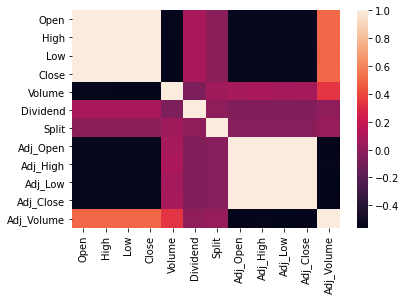

In [34]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

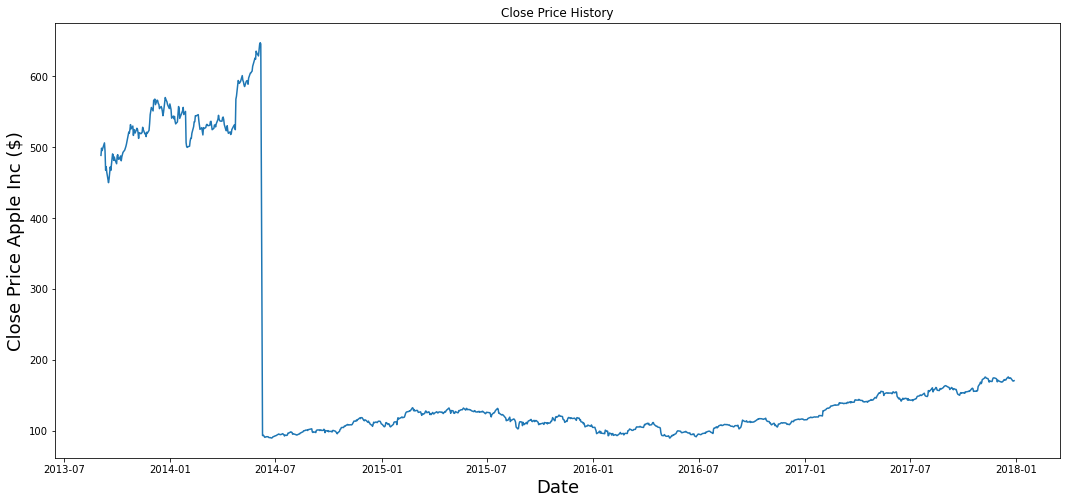

In [35]:
#visualize the closing price history
plt.figure(figsize=(18,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price Apple Inc ($)", fontsize=18)
plt.show()

In [36]:
df.head()

Open    High     Low    Close      Volume  Dividend  Split  \
Date                                                                       
2013-09-03  493.10  500.60  487.35  488.580  11854600.0       0.0    1.0   
2013-09-04  499.56  502.24  496.28  498.691  12322600.0       0.0    1.0   
2013-09-05  500.25  500.68  493.64  495.270   8441700.0       0.0    1.0   
2013-09-06  498.44  499.38  489.95  498.220  12840200.0       0.0    1.0   
2013-09-09  505.00  507.92  503.48  506.170  12167400.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2013-09-03  15.619650  15.857223  15.437510  15.476472  331928800.0  
2013-09-04  15.824280  15.909173  15.720381  15.796753  345032800.0  
2013-09-05  15.846136  15.859757  15.636755  15.688388  236367600.0  
2013-09-06  15.788802  15.818578  15.519869  15.781833  359525600.0  
2013-09-09  15.996600  16.089095  15.948451  16.033661  340687200.0

In [37]:
df.fillna(-99999)

Open     High      Low    Close      Volume  Dividend  Split  \
Date                                                                         
2013-09-03  493.10  500.600  487.350  488.580  11854600.0       0.0    1.0   
2013-09-04  499.56  502.240  496.280  498.691  12322600.0       0.0    1.0   
2013-09-05  500.25  500.680  493.640  495.270   8441700.0       0.0    1.0   
2013-09-06  498.44  499.380  489.950  498.220  12840200.0       0.0    1.0   
2013-09-09  505.00  507.920  503.480  506.170  12167400.0       0.0    1.0   
...            ...      ...      ...      ...         ...       ...    ...   
2017-12-21  174.17  176.020  174.100  175.010  20949896.0       0.0    1.0   
2017-12-22  174.68  175.424  174.500  175.010  16349444.0       0.0    1.0   
2017-12-26  170.80  171.470  169.679  170.570  33185536.0       0.0    1.0   
2017-12-27  170.10  170.780  169.710  170.600  21498213.0       0.0    1.0   
2017-12-28  171.00  171.850  170.480  171.080  16480187.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2013-09-03  15.619650  15.857223  15.437510  15.476472  331928800.0  
2013-09-04  15.824280  15.909173  15.720381  15.796753  345032800.0  
2013-09-05  15.846136  15.859757  15.636755  15.688388  236367600.0  
2013-09-06  15.788802  15.818578  15.519869  15.781833  359525600.0  
2013-09-09  15.996600  16.089095  15.948451  16.033661  340687200.0  
...               ...        ...        ...        ...          ...  
2017-12-21  41.899570  42.344619  41.882730  42.101646   83799584.0  
2017-12-22  42.022259  42.201241  41.978957  42.101646   65397776.0  
2017-12-26  41.088858  41.250038  40.819183  41.033528  132742144.0  
2017-12-27  40.920461  41.084047  40.826640  41.040745   85992852.0  
2017-12-28  41.136972  41.341454  41.011877  41.156217   65920748.0  

[1090 rows x 12 columns]

In [38]:
#Scale the data 
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [39]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [24]:
df.dropna(inplace=True)

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
df.head()

Open    High     Low    Close      Volume  Dividend  Split  \
Date                                                                       
2013-09-03  493.10  500.60  487.35  488.580  11854600.0       0.0    1.0   
2013-09-04  499.56  502.24  496.28  498.691  12322600.0       0.0    1.0   
2013-09-05  500.25  500.68  493.64  495.270   8441700.0       0.0    1.0   
2013-09-06  498.44  499.38  489.95  498.220  12840200.0       0.0    1.0   
2013-09-09  505.00  507.92  503.48  506.170  12167400.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2013-09-03  15.619650  15.857223  15.437510  15.476472  331928800.0  
2013-09-04  15.824280  15.909173  15.720381  15.796753  345032800.0  
2013-09-05  15.846136  15.859757  15.636755  15.688388  236367600.0  
2013-09-06  15.788802  15.818578  15.519869  15.781833  359525600.0  
2013-09-09  15.996600  16.089095  15.948451  16.033661  340687200.0

In [44]:
#spliting data into train and test 
x=df[["Open","High","Low","Close","Volume","Split","Adj_Open","Adj_High","Adj_Low","Adj_Volume"]].values
y=df["Adj_Close"].values

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [47]:
regressor.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred=regressor.predict(x_test)

In [49]:
print(regressor.coef_)

[ 4.52389387e-02 -6.10232500e-02 -5.84543471e-02  7.42062118e-02
 -5.64352948e-10  1.11022302e-16 -5.71049236e-01  8.20920118e-01
  7.50442348e-01  4.73595082e-11]


In [50]:
print("Mean Square Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Square Error: 0.007707525155843301


In [51]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error :", metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.06909874165156912
Mean Squared Error: 0.007707525155843301
Root Mean Squared Error : 0.007707525155843301


In [54]:
clf = svm.SVR()

In [56]:
clf.fit(x_train, y_train)

SVR()

In [58]:
confidence = clf.score(x_test, y_test)

In [59]:
print(confidence)

0.4370600916154608


In [61]:
clf = LinearRegression()